In [134]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [135]:
#Preparing for data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
n_benign = sum(1 for i in y if i == 0)
n_malignant = sum(1 for i in y if i == 1)

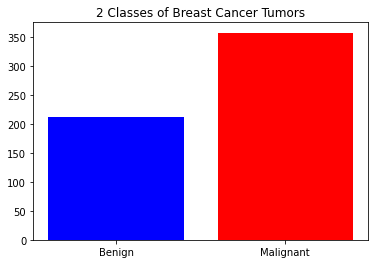

In [136]:
# x-coordinates of left sides of bars 
left = [0, 1]
  
# heights of bars
height = [n_benign, n_malignant]
  
# labels for bars
tick_label = ['Benign', 'Malignant']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'red'])
  
# plot title
plt.title('2 Classes of Breast Cancer Tumors')
  
# function to show the plot
plt.show()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#Scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [138]:
class Logistic_Regression(nn.Module):
    def __init__(self, n_input_feature):
        super(Logistic_Regression, self).__init__()
        self.Linear = nn.Linear(n_input_feature, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.Linear(x))
        return y_predicted

model1 = Logistic_Regression(n_features)

In [139]:
#Initize the optimizer
learning_rate = 0.5
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr = learning_rate)

num_epoch = 10000
for epoch in range(num_epoch):
    y_predicted = model1(X_train)
    loss = criterion(y_predicted, y_train)

    #Backward Pass
    loss.backward()

    #Update
    optimizer.step()

    #Empty the gradient
    optimizer.zero_grad()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")

epoch: 1000, loss = 0.0262
epoch: 2000, loss = 0.0221
epoch: 3000, loss = 0.0199
epoch: 4000, loss = 0.0182
epoch: 5000, loss = 0.0169
epoch: 6000, loss = 0.0158
epoch: 7000, loss = 0.0149
epoch: 8000, loss = 0.0140
epoch: 9000, loss = 0.0133
epoch: 10000, loss = 0.0126


In [140]:
with torch.no_grad():
    y_predicted = model1(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {acc:.4f}") 
    report = classification_report(y_test, y_predicted_cls, labels=[0, 1], target_names=["Benign", "Malignant"], output_dict=True)

Accuracy = 0.9737


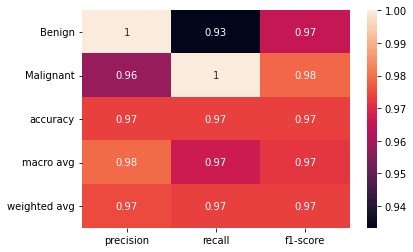

In [141]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [153]:
#Feature Selection using PCA and select only 20
pca = PCA(n_components = 2)
pca.fit(X)
X_transform = X
X_transform = pca.transform(X_transform)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.2, random_state = 1234)

#Scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [156]:
model2 = Logistic_Regression(2)

In [157]:
print(y_train[0])

tensor([1.])


In [158]:
#Initize the optimizer
learning_rate = 0.5
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr = learning_rate)

num_epoch = 10000
for epoch in range(num_epoch):
    y_predicted = model2(X_train)
    loss = criterion(y_predicted, y_train)

    #Backward Pass
    loss.backward()

    #Update
    optimizer.step()

    #Empty the gradient
    optimizer.zero_grad()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")

with torch.no_grad():
    y_predicted = model2(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {acc:.4f}") 
    report = classification_report(y_test, y_predicted_cls, labels=[0, 1], target_names=["Benign", "Malignant"], output_dict=True)

epoch: 1000, loss = 0.1690
epoch: 2000, loss = 0.1670
epoch: 3000, loss = 0.1668
epoch: 4000, loss = 0.1668
epoch: 5000, loss = 0.1667
epoch: 6000, loss = 0.1667
epoch: 7000, loss = 0.1667
epoch: 8000, loss = 0.1667
epoch: 9000, loss = 0.1667
epoch: 10000, loss = 0.1667
Accuracy = 0.9298


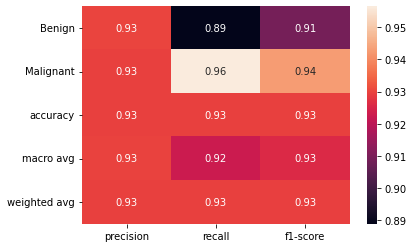

In [159]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)